## PLANT DISEASE PREDICTION FROM LEAF IMAGES

**Seeding for reproducibility**

In [2]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

**Importing the dependencies**

In [1]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

# DATA UPLOAD USING KAGGLE

Upload the kaggle.json file

In [3]:
kaggle_credentails = json.load(open("kaggle.json"))

In [4]:
# setup Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

In [5]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
100% 2.03G/2.04G [00:18<00:00, 175MB/s]
100% 2.04G/2.04G [00:18<00:00, 117MB/s]


In [6]:
!ls

kaggle.json  plantvillage-dataset.zip  sample_data


In [7]:
# Unzip the downloaded dataset
with ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [8]:
print(os.listdir("plantvillage dataset"))


print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['grayscale', 'segmented', 'color']
38
['Potato___Early_blight', 'Grape___Esca_(Black_Measles)', 'Tomato___Leaf_Mold', 'Potato___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)']
38
['Potato___Early_blight', 'Grape___Esca_(Black_Measles)', 'Tomato___Leaf_Mold', 'Potato___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)']
38
['Potato___Early_blight', 'Grape___Esca_(Black_Measles)', 'Tomato___Leaf_Mold', 'Potato___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)']


**Number of Classes = 38**

In [9]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:10])

423
['4a31039d-54b1-4a0f-bc5f-2032f94c27af___Mt.N.V_HL 9040.JPG', 'e53defea-84c4-4b41-8c12-a53dda9e61b8___Mt.N.V_HL 9085.JPG', 'd9399e07-dc4e-4c86-af6d-a74a4bccc089___Mt.N.V_HL 8984.JPG', 'b53106de-9795-4c49-ab42-6aac4ff9c886___Mt.N.V_HL 6157.JPG', '17572261-c800-42b7-8baf-2f73f7657578___Mt.N.V_HL 9009.JPG', '0e49ddc9-b969-46e6-af95-8d21dfac22ec___Mt.N.V_HL 9088.JPG', '1180dbb8-4509-4f56-a5f6-15ceac163ff9___Mt.N.V_HL 8928.JPG', '8af21b75-7158-4286-acdf-ef35cf54fe26___Mt.N.V_HL 6116.JPG', 'f5310751-1f5c-426e-9e50-52bb5b7a2145___Mt.N.V_HL 8950.JPG', '2dacf3f7-797b-4d4c-bf77-1d1a8f6d965d___Mt.N.V_HL 9117.JPG']


**Data Preprocessing**

In [12]:
import matplotlib.image as mpimg


In [10]:
# Dataset Path
base_dir = 'plantvillage dataset/color'

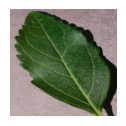

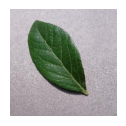

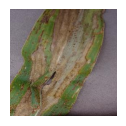

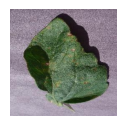

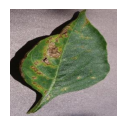

In [19]:
image_path1 = '/content/plantvillage dataset/color/Cherry_(including_sour)___healthy/0008f3d3-2f85-4973-be9a-1b520b8b59fc___JR_HL 4092.JPG'
image_path2 = '/content/plantvillage dataset/color/Blueberry___healthy/0137389a-9b78-4a94-afdb-c2b50861f89c___RS_HL 2347.JPG'
image_path3 = '/content/plantvillage dataset/color/Corn_(maize)___Northern_Leaf_Blight/005318c8-a5fa-4420-843b-23bdda7322c2___RS_NLB 3853 copy.jpg'
image_path4 = '/content/plantvillage dataset/color/Tomato___Target_Spot/0044d10f-7062-4655-8abd-9fffc5b2f152___Com.G_TgS_FL 7908.JPG'
image_path5 = '/content/plantvillage dataset/color/Pepper,_bell___Bacterial_spot/0022d6b7-d47c-4ee2-ae9a-392a53f48647___JR_B.Spot 8964.JPG'

l = [image_path1, image_path2, image_path3, image_path4, image_path5]

for i in range (len(l) ) :
  plt.figure( figsize= ( 8 ,6 ))
  img = mpimg.imread(l[i])
  plt.subplot( 1 , 5 , i+1)
  plt.imshow(img)
  plt.axis('off')
  plt.show()



In [20]:
image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

# Read the image
img = mpimg.imread(image_path)
# numpy array expected
print(img)

[[[179 175 176]
  [181 177 178]
  [184 180 181]
  ...
  [115 112 105]
  [108 105  98]
  [101  98  91]]

 [[176 172 173]
  [177 173 174]
  [178 174 175]
  ...
  [113 110 103]
  [111 108 101]
  [109 106  99]]

 [[180 176 177]
  [180 176 177]
  [180 176 177]
  ...
  [108 105  98]
  [111 108 101]
  [114 111 104]]

 ...

 [[137 128 119]
  [131 122 113]
  [125 116 107]
  ...
  [ 74  65  48]
  [ 74  65  48]
  [ 73  64  47]]

 [[136 127 118]
  [132 123 114]
  [128 119 110]
  ...
  [ 77  69  50]
  [ 75  67  48]
  [ 75  67  48]]

 [[133 124 115]
  [133 124 115]
  [132 123 114]
  ...
  [ 81  73  54]
  [ 80  72  53]
  [ 79  71  52]]]


In [21]:
# Image Parameters
img_size = 224
batch_size = 32

**Train Test Split**

In [22]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

In [23]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [24]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


**Convolutional Neural Network**

In [25]:
# Model Definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
# model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Model training**

In [28]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=5,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 98s 67ms/step - accuracy: 0.6049 - loss: 1.6217 - val_accuracy: 0.8692 - val_loss: 0.4307
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 132s 64ms/step - accuracy: 0.9209 - loss: 0.2617 - val_accuracy: 0.8672 - val_loss: 0.4343
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 90s 67ms/step - accuracy: 0.9679 - loss: 0.1012 - val_accuracy: 0.8967 - val_loss: 0.3798
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 89s 65ms/step - accuracy: 0.9853 - loss: 0.0465 - val_accuracy: 0.8808 - val_loss: 0.4790
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 141s 104ms/step - accuracy: 0.9816 - loss: 0.0594 - val_accuracy: 0.8787 - val_loss: 0.5421


**Model Evaluation**

In [29]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
339/339 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.8787 - loss: 0.5358
Validation Accuracy: 87.88%


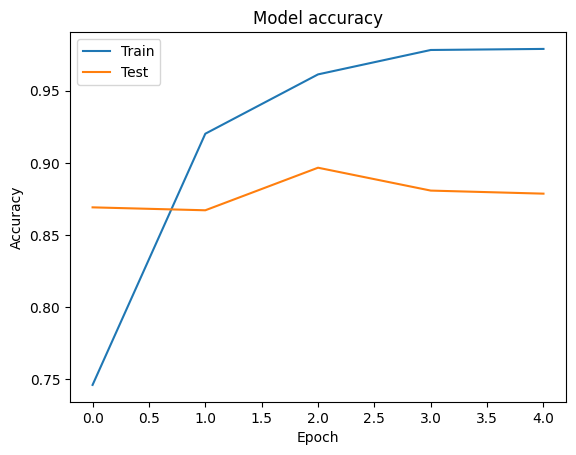

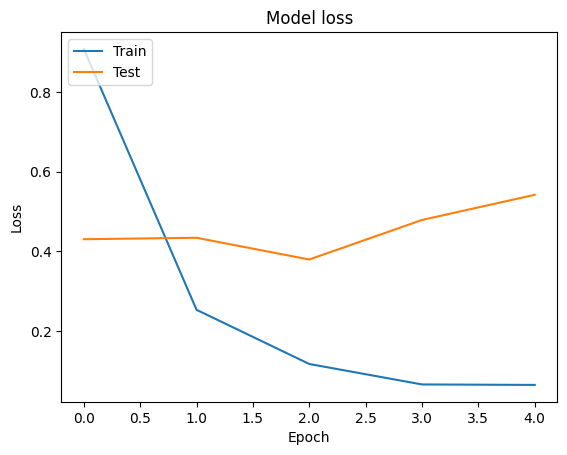

In [30]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**Building a Predictive System**

In [31]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [32]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [33]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [34]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [36]:
# Example Usage
image_path = '/content/plantvillage dataset/color/Cherry_(including_sour)___healthy/0008f3d3-2f85-4973-be9a-1b520b8b59fc___JR_HL 4092.JPG'
#image_path = '/content/test_blueberry_healthy.jpg'
#image_path = '/content/test_potato_early_blight.jpg'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 958ms/step
Predicted Class Name: Cherry_(including_sour)___healthy


**Save the model to Google drive or local**

In [38]:
model.save('/content/drive/MyDrive/plant_disease_prediction_model.h5')

In [39]:
model.save('plant_disease_prediction_model.h5')

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
